In [1]:
import numpy as np
import scipy
from scipy.misc import imread
from matplotlib import pyplot as ppl

import maxflow

import pickle
import numpy as np

with open("../data/maps.pkl", "rb") as in_f:
    maps = pickle.load(in_f)
W = np.loadtxt("../data/W.csv", delimiter=',')

In [2]:
print(W.shape)
print(np.count_nonzero(W))

(216, 216)
2712


In [38]:
def get_msid_on_fixation_point(sp_map):
    # fixation point is assumed to be at the center of the image.
    init_obj_id = sp_map[int(sp_map.shape[0]/2.0), int(sp_map.shape[1]/2.0)]
    return init_obj_id

def create_graph(W):
    g = maxflow.Graph[float](W.shape[0], np.count_nonzero(W))
    nodes = g.add_nodes(W.shape[0])

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            if W[i, j] > 0:
                g.add_edge(nodes[i], nodes[j], W[i, j], W[j, i])
    return g, nodes
g, nodes = create_graph(W)

### Using all nodes as source and sink

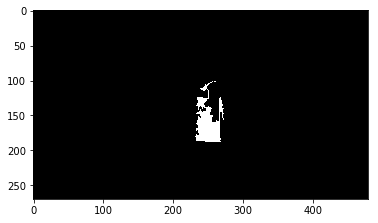

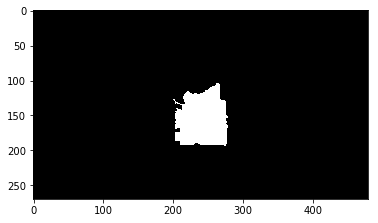

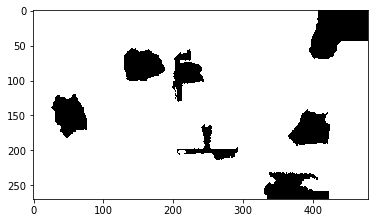

In [42]:
import sys
sys.path.append("../")
import superpixels as sp
import visualization as viz
from matplotlib import pyplot as plt

num_bg = 10

spm = sp.SuperpixelsMaps(maps)

obj_ids = []
for map_id, sp_map in enumerate(maps):
    msid = get_msid_on_fixation_point(sp_map)
    sid = spm.msid2sid(map_id, msid)
    obj_ids.append(sid)

bg_ids = spm.pick_random_except(obj_ids, num_bg)

for obj_id in obj_ids:
    g.add_tedge(nodes[obj_id], 1000, 0)

for bg_id in bg_ids:
    g.add_tedge(nodes[bg_id], 0, 1000)
    
g.maxflow()

obj_map_msids = [] # [[msids of map 1], [msids of map 2], etc.]
bg_map_msids = []

for i, node in enumerate(nodes):
    seg = g.get_segment(node)
    map_id, msid = spm.sid2msid(i)
    if seg == 0:
        if len(obj_map_msids) <= map_id:
            obj_map_msids.append([])
        obj_map_msids[map_id].append(msid)
    else:
        if len(bg_map_msids) <= map_id:
            bg_map_msids.append([])
        bg_map_msids[map_id].append(msid)

for map_id, msids in enumerate(obj_map_msids):
    img = viz.highlight_superpixels_hsl(maps[map_id], msids)
    plt.figure()
    plt.imshow(img)
    
plt.show()

In [43]:
print(obj_ids)
print(obj_map_msids)

[42, 113, 185]
[[42], [41, 42, 54], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71]]


### One node for source and another for sink

In [ ]:
num_bg = 10

spm = sp.SuperpixelsMaps(maps)

obj_ids = []
for map_id, sp_map in enumerate(maps):
    msid = get_msid_on_fixation_point(sp_map)
    sid = spm.msid2sid(map_id, msid)
    obj_ids.append(sid)

bg_ids = spm.pick_random_except(obj_ids, num_bg)

for obj_id in obj_ids:
    g.add_tedge(nodes[obj_id], 1000, 0)

for bg_id in bg_ids:
    g.add_tedge(nodes[bg_id], 0, 1000)
    
g.maxflow()

obj_map_msids = [] # [[msids of map 1], [msids of map 2], etc.]
bg_map_msids = []

for i, node in enumerate(nodes):
    seg = g.get_segment(node)
    map_id, msid = spm.sid2msid(i)
    if seg == 0:
        if len(obj_map_msids) <= map_id:
            obj_map_msids.append([])
        obj_map_msids[map_id].append(msid)
    else:
        if len(bg_map_msids) <= map_id:
            bg_map_msids.append([])
        bg_map_msids[map_id].append(msid)

for map_id, msids in enumerate(obj_map_msids):
    img = viz.highlight_superpixels_hsl(maps[map_id], msids)
    plt.figure()
    plt.imshow(img)
    
plt.show()